# <font color='#00008B'>  <center> Machine and Deep Learning Solutions for Bank Direct Marketing Campaigns </center> </font>

## <font color='#00008B'> Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") #To filter the future warnings. 

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# Libaries to help with statistical analysis 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libaries to help with Data Normalization
from sklearn.preprocessing import MinMaxScaler

## <font color='#00008B'> 1. Loading the Dataset Under Study

In [2]:
data = pd.read_csv(r'Dataset.csv',delimiter=';')
data.head()

#link to dataset:https://archive.ics.uci.edu/ml/datasets/bank+marketing

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
np.random.seed(1)
data.sample(n=10) # random sample of the data 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35577,32,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,mon,114,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
13950,33,blue-collar,single,basic.6y,unknown,yes,yes,cellular,jul,fri,103,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
29451,25,self-employed,divorced,university.degree,no,yes,no,cellular,apr,mon,227,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
32295,34,blue-collar,single,high.school,no,yes,no,cellular,may,fri,56,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
27477,53,technician,married,professional.course,no,yes,no,cellular,nov,fri,11,7,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
31507,46,services,married,basic.9y,no,no,yes,cellular,may,wed,227,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
32167,33,technician,single,professional.course,no,yes,no,cellular,may,fri,70,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
24580,46,technician,married,high.school,no,yes,no,cellular,nov,mon,171,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
2954,42,technician,married,professional.course,unknown,no,no,telephone,may,wed,295,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
34998,30,services,single,high.school,no,yes,no,cellular,may,fri,159,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


## <font color='#00008B'> 2. Data Understanding

### 2.1 Dimension of of the dataset under study

In [4]:
data.shape

(41188, 21)

### 2.2 Checking the data types of the attributes in the data set under study

In [5]:
data.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data_columns = data.columns.tolist()

num_cols = []
cat_cols = []
for col in data_columns:
    if (data[col].dtype != "object") & (data[col].dtype != "bool") :
        num_cols.append(col)
    else:
        cat_cols.append(col)
print("\nNumerical Columns : \n",num_cols)                          
print("\nCategorical Columms : \n",cat_cols)  


Numerical Columns : 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Columms : 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### 2.3 Descriptive statistics for all quantitative attributes in the data set under study

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### 2.4 Descriptive statistics for all qualitative attributes in the data set under study

In [8]:
data.describe(include = 'object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


### 2.5 Class Distribution

In [9]:
print(data.groupby('y').size())

y
no     36548
yes     4640
dtype: int64


### 2.6 Checking if we have duplicated rows / records

In [10]:
dupes = data.duplicated()
sum(dupes)

12

### 2.7 Checking if we have missing and NULL Values

In [11]:
data.isnull().values.any()

False

In [12]:
data.isnull().sum().sum() 


0

### 2.8 Checking if we have duplicated rows

In [13]:
##Identify duplicates records in the data
dupes = data.duplicated()
sum(dupes)

12

## <font color='#00008B'> 3. Data Visualization

### 3. 1 Univariate Visualization

#### 3.1.1 Histograms of the quantitative attributes in data set under study

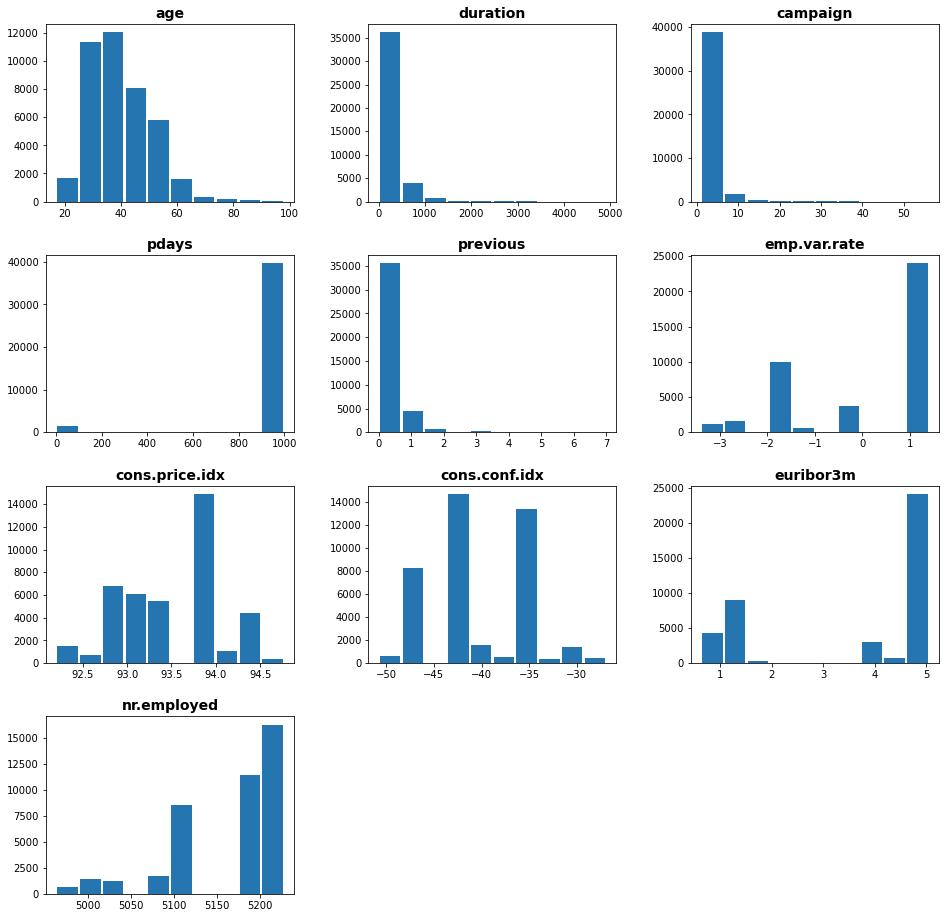

In [14]:
fig= data.hist(figsize=(16,16), grid = False, rwidth = 0.9, color='#2576B0')
for x in fig.ravel():
    x.title.set_size(14)
    x.title.set_weight("bold")

#### 3.1.2 Box plots of the quantitative attributes in the data set under study

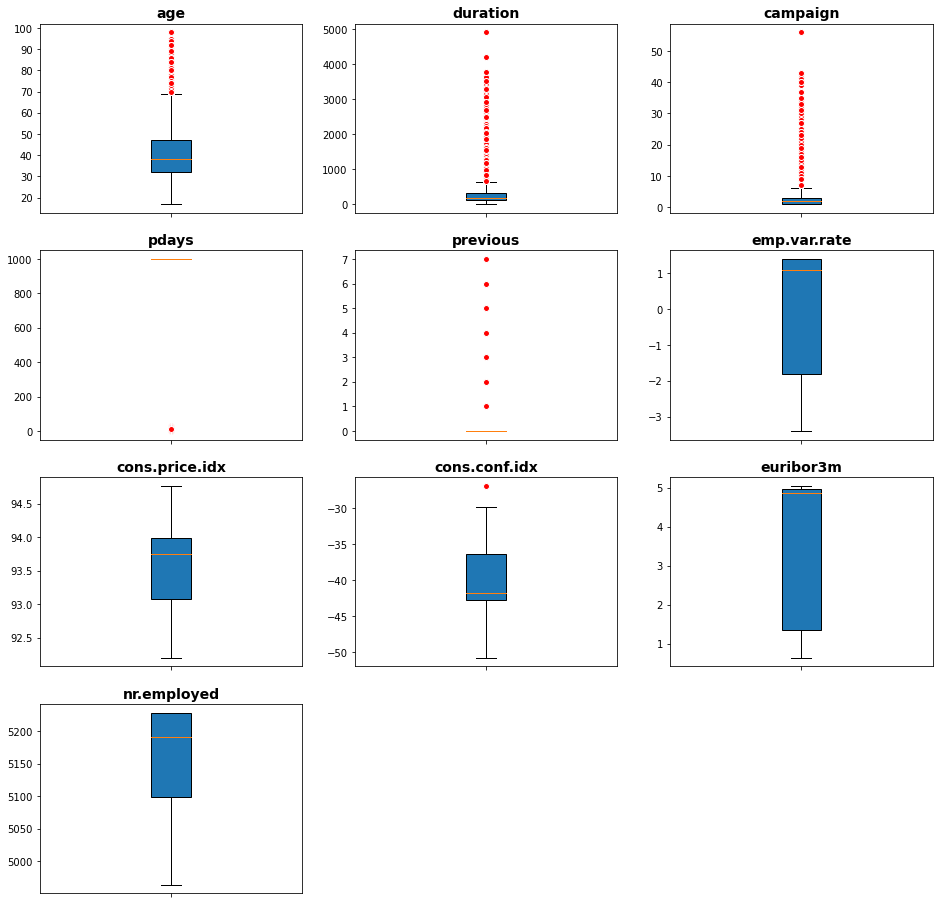

In [15]:
num_features = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(16,16))
redc = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

for i, j in enumerate(num_features):
    plt.subplot(4,3,i+1)
    plt.boxplot(data[j],flierprops=redc, patch_artist=True)
    plt.set_facecolor='#2576B0'
    #plt.title(j.capitalize(),fontweight="bold", fontsize=14)
    plt.title(j,fontweight="bold", fontsize=14)
    plt.xticks([1], [''])

#### 3.1.3 Bar charts of qualitative attributes in the data set under study

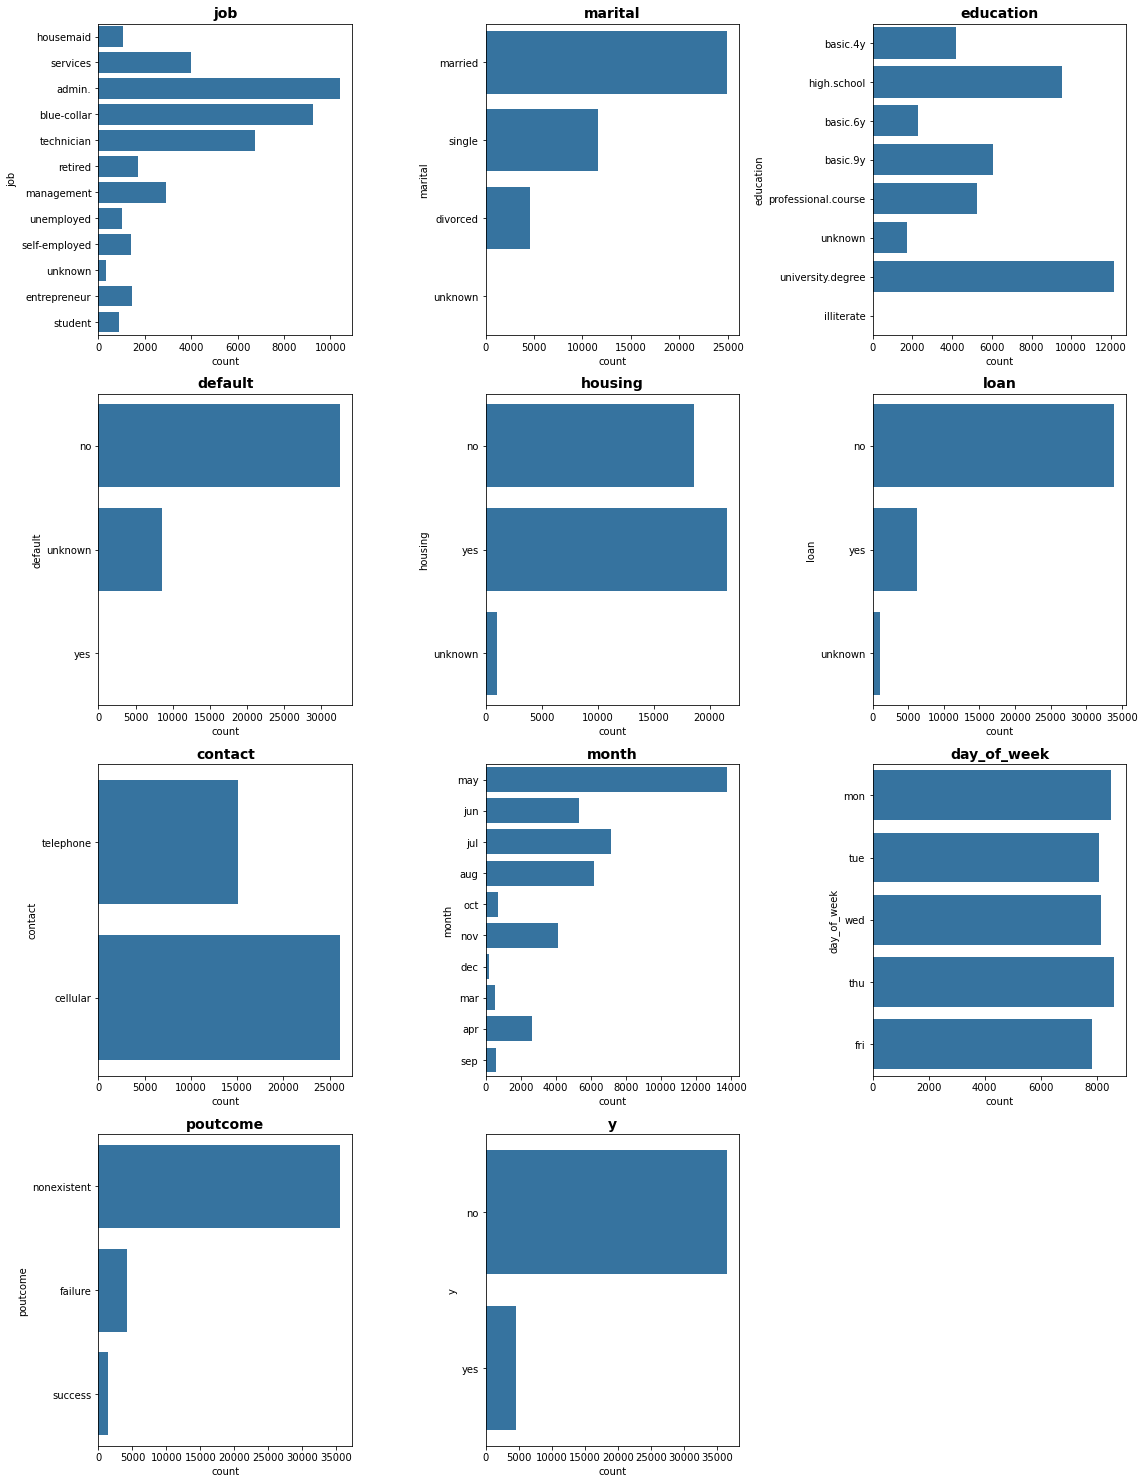

In [16]:
cat_features = data.select_dtypes(exclude = np.number)
plt.figure(figsize=(16,82))
plotNo =1
for i in cat_features:
    ax = plt.subplot(16,3,plotNo)
    sns.countplot(y=i, data=data, color='#2576B0')
    plt.title(i,fontweight="bold", fontsize=14)
    plotNo+=1
        
plt.tight_layout()

### 3. 2 Multivariate Visualization

#### 3.2.1 Histograms by class value of quantitative attributes

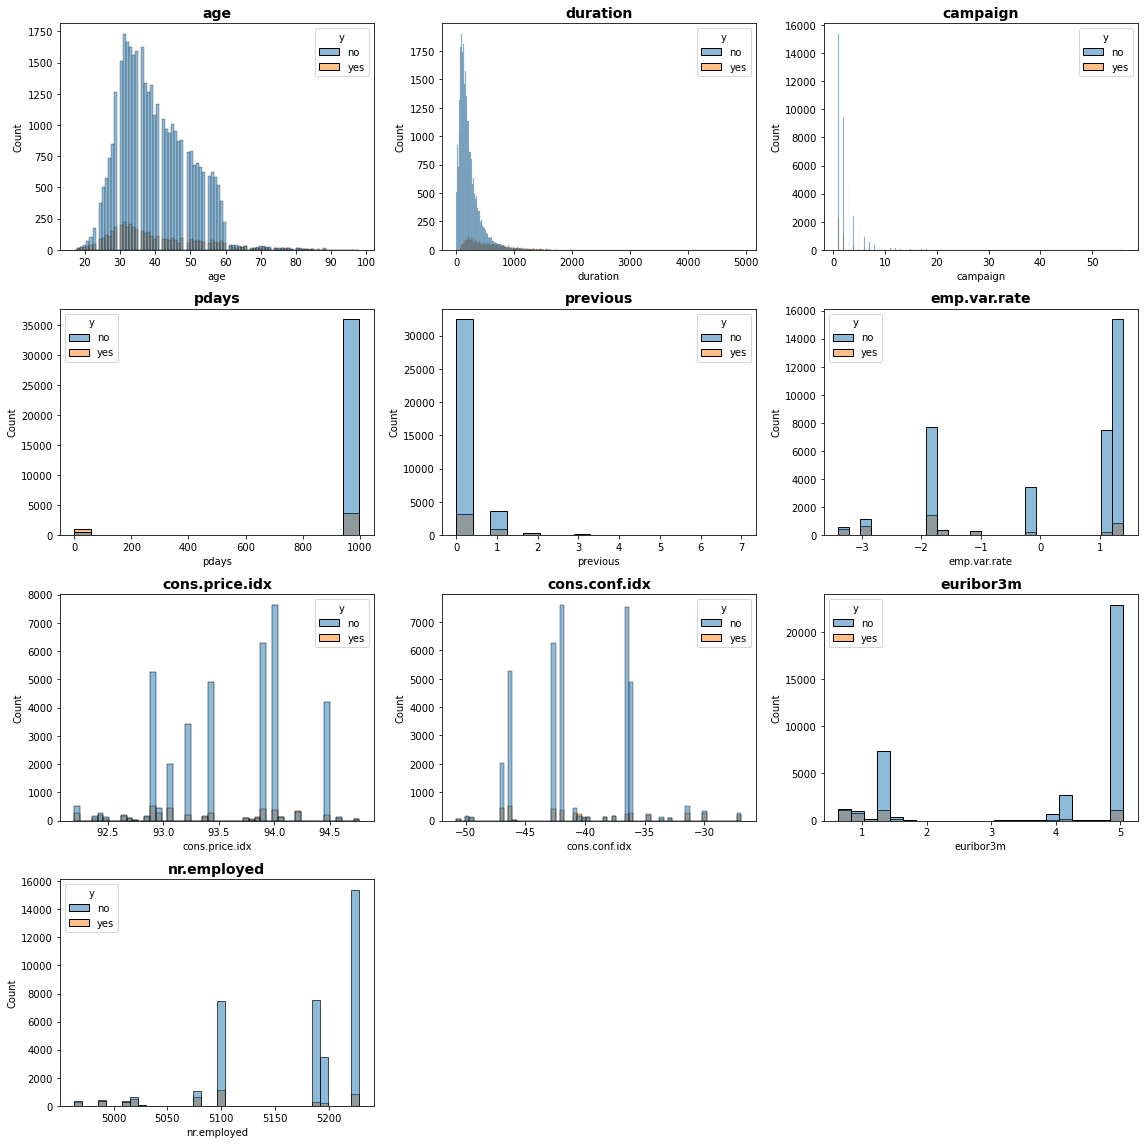

In [17]:
num_features = data.select_dtypes(include = np.number)
plt.figure(figsize=(16,16))
plotNo = 1

for column in num_features:
    plt.subplot(4,3,plotNo)
    sns.histplot(x=num_features[column],hue=data.y)
    plt.title(column,fontweight="bold", fontsize=14)
    plotNo+=1

plt.tight_layout()

#### 3.2.2 Bar charts by class value of qualitative attributes in the data set under study

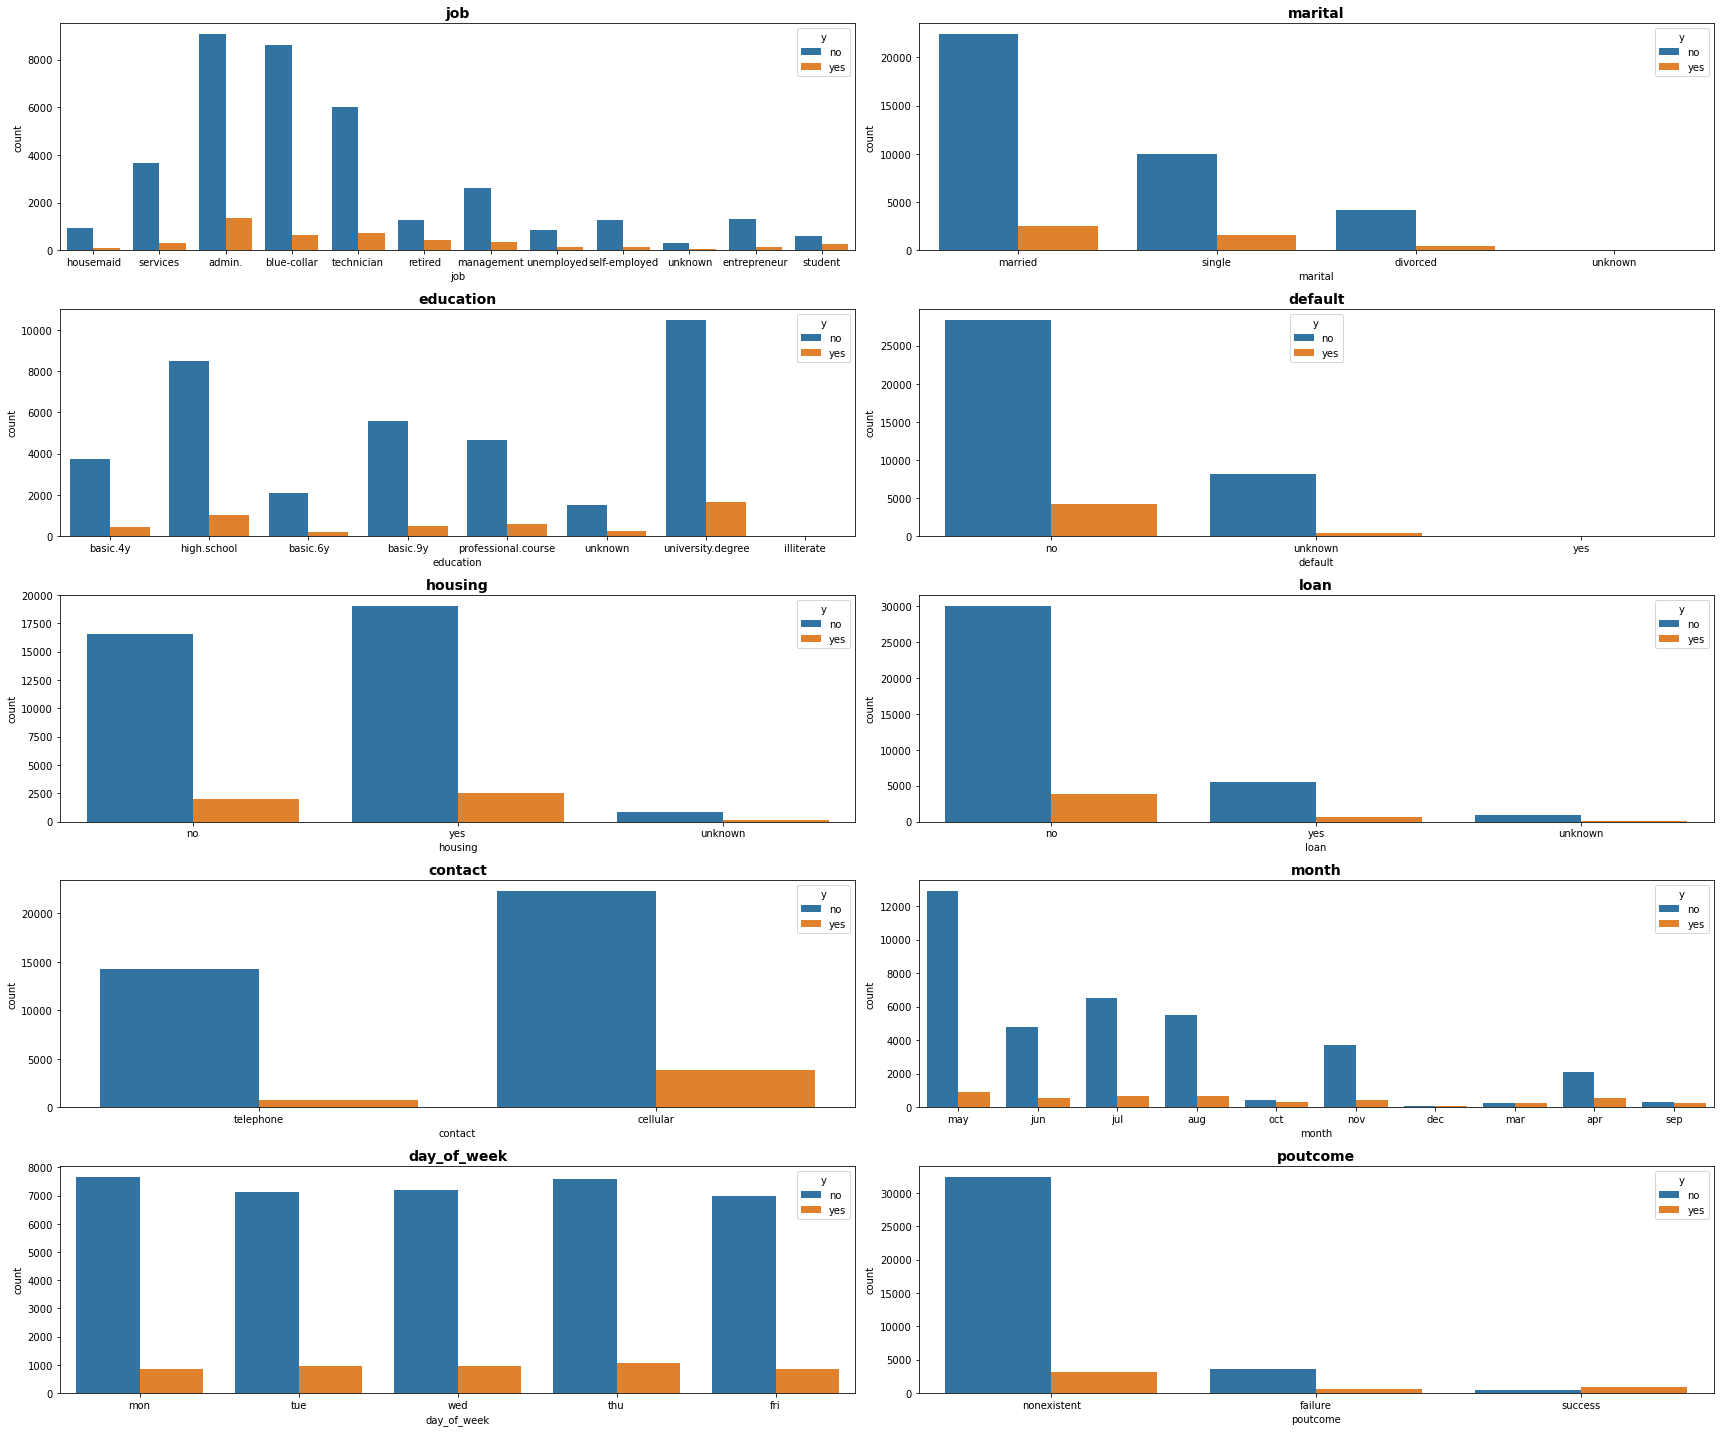

In [18]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
for col, ax in zip(cat_features[0:], axs.ravel()):
    sns.countplot(x=col, data=data, ax=ax,hue=data.y).set_title(col, weight="bold", size=14)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()

## <font color='#00008B'> 4. Data Pre-processing

### 4.1 Outlier Detection and Filtering & Dropping Duplicate Rows

In [19]:
## Based on 2.8 sub section, we found that we have 12 duplicate rows which could be data entry errors
## let's get rid of these duplicated rows, so our data can be more consistent and accurate 
data = data.drop_duplicates()
data.shape

(41176, 21)

In [20]:
## Based on 3.1.2 sub section where we plotted the Box plots for the quantitative attributes in the data set under study,
## we found that the following variables are having outliers needed to be dropped
outlier_cols = ["age", "duration", "campaign", "cons.conf.idx"]

# Due to its robustness to outliers, the quartile and interquartile distance method was used in this study to detect and filter outliers from original columns [Ref 1]
# Ref 1: Kganyago, Mahlatse, et al. "Study on blazing wildfires at the outeniqua pass in South Africa during the october/november 2018 period." Remote Sensing Applications: Society and Environment 21 (2021): 100464.

df = data.copy()

for field_name in outlier_cols:
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

df.shape

(35165, 21)

### 4.2 Variable Preprocessing

### 4.2.1 Label-Encoding for Output Variable (y)

In [21]:
df_sampled = df.copy()
target_col = 'y'
df_sampled['y'] = df_sampled['y'].replace({"yes" : 1, "no" : 0})
df_sampled['y'].value_counts()

0    32435
1     2730
Name: y, dtype: int64

###  4.2.2 One-Hot Encoding for categorical features, except for education which is an ordered variable

In [22]:
# encoding will be used so that ML and DL algorithms can easy understands the categorical features
# Helper fUnction for Plotting cat_cols
def categorical_plots(df_sampled, col, rotation = False):
    plt.figure(figsize = (15, 5))
    ax =sns.countplot(x = col, data=df_sampled, hue='y',order = df_sampled[col].value_counts().index)
    ax.set_title(col ,fontsize = 14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.1, 1),ncol=1, fancybox=True, shadow=True)
    for c in ax.containers:
        ax.bar_label(c) 
    ax.margins(y=0.2)
    plt.show()   

    tab = pd.crosstab(df_sampled[col], df_sampled['y'], normalize="index").sort_index(axis=1, ascending=True)
    ax = tab.plot(kind="bar", stacked=True, figsize = (15, 5))
    ax.set_title(col ,fontsize = 14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.1, 1),ncol=1, fancybox=True, shadow=True)
    for x in ax.containers:
        ax.bar_label(x, label_type='center', color='white')
    plt.tight_layout()
    plt.show()   


#### 4.2.2.1 Ordinal Encoding for education categorical feature

In [23]:
# Ordinal Encoding was used for education categorical variable as it is an ordered variable.   
education_map = {"unknown" : -1, 'illiterate' : 0, "basic.4y" : 1, "basic.6y" : 2, "basic.9y":3, "high.school" :4,
                "professional.course" : 5, "university.degree" : 6}

df_sampled['education'] = df_sampled['education'].replace(education_map)
df_sampled['education'].value_counts()

 6    10414
 4     8195
 3     5267
 5     4496
 1     3380
 2     1958
-1     1441
 0       14
Name: education, dtype: int64

#### 4.2.2.2 One-Hot Encoding for the other categorical features

In [24]:
# One-Hot Encoding was used for all categorical features (except education categorical variable) as they have no ordinal relationship

try:
    df_sampled = pd.get_dummies(df_sampled, columns=["job", "marital", "housing", "default","loan","month","contact","day_of_week", "poutcome"])
except:
    pass
df_sampled.head()


,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
1,57,4,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,37,4,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
3,40,2,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,56,4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [25]:
df_sampled.shape

(35165, 57)

### 4.2.3 Note on processing of pdays variable

In [26]:
df_sampled['pdays'].value_counts()
# Pdays = 999 means that the bank client was not previously contacted by Bank custmer sevice. 
# Comparing with most of Pdays data points (as shown below) which are below 27, 999 is very large and may influence ML construction process. so, 999 will be changed to 0 in our study as in [Ref 1].
# Ref 1: Koçoğlu, Fatma Önay, and Şakir Esnaf. "Machine Learning Approach and Model Performance evaluation for Tele-Marketing Success Classification." International Journal of Business Analytics (IJBAN) 9.5 (2022): 1-18.

999    33959
3        362
6        308
4         97
9         54
12        50
7         45
2         45
10        44
5         36
13        28
1         23
11        22
15        20
14        15
0         13
8         10
16        10
17         8
18         6
22         3
21         2
25         1
26         1
27         1
20         1
19         1
Name: pdays, dtype: int64

In [27]:
## convert 999 to 0 in pdays
df_sampled['pdays'] = df_sampled['pdays'].replace({999 : 0})
df_sampled['pdays'].value_counts()

0     33972
3       362
6       308
4        97
9        54
12       50
2        45
7        45
10       44
5        36
13       28
1        23
11       22
15       20
14       15
8        10
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: pdays, dtype: int64

### 4.3 Data Normalization

In [28]:
df_cleaned = df_sampled.copy()
df_cleaned.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
1,57,4,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,37,4,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
3,40,2,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,56,4,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [29]:
## from above observation, the selected columns to apply normalization are:
columns_to_scale = ['age', 'education', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 
                    'cons.conf.idx', 'euribor3m', 'nr.employed']

## create a min-max scaler object
MinMax_Scaler = MinMaxScaler()
## clone copied df_cleaned
df_scaled = df_cleaned.copy()

## apply min-max scaling for selected columns of cleaned dataframe to prevent any bias may occur towards features with a higher magnitude
df_scaled[columns_to_scale]= MinMax_Scaler.fit_transform(df_scaled[columns_to_scale])
df_scaled.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.750000,0.285714,0.405280,0.0,0.0,0,0.9375,0.698753,0.685714,0.957379,0.859735,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
1,0.769231,0.714286,0.231366,0.0,0.0,0,0.9375,0.698753,0.685714,0.957379,0.859735,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,0.384615,0.714286,0.350932,0.0,0.0,0,0.9375,0.698753,0.685714,0.957379,0.859735,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0.442308,0.428571,0.234472,0.0,0.0,0,0.9375,0.698753,0.685714,0.957379,0.859735,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0.750000,0.714286,0.476708,0.0,0.0,0,0.9375,0.698753,0.685714,0.957379,0.859735,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


### 4.4 Feature / Variable Selection 

#### 4.4.1 Correlation Map between Variables

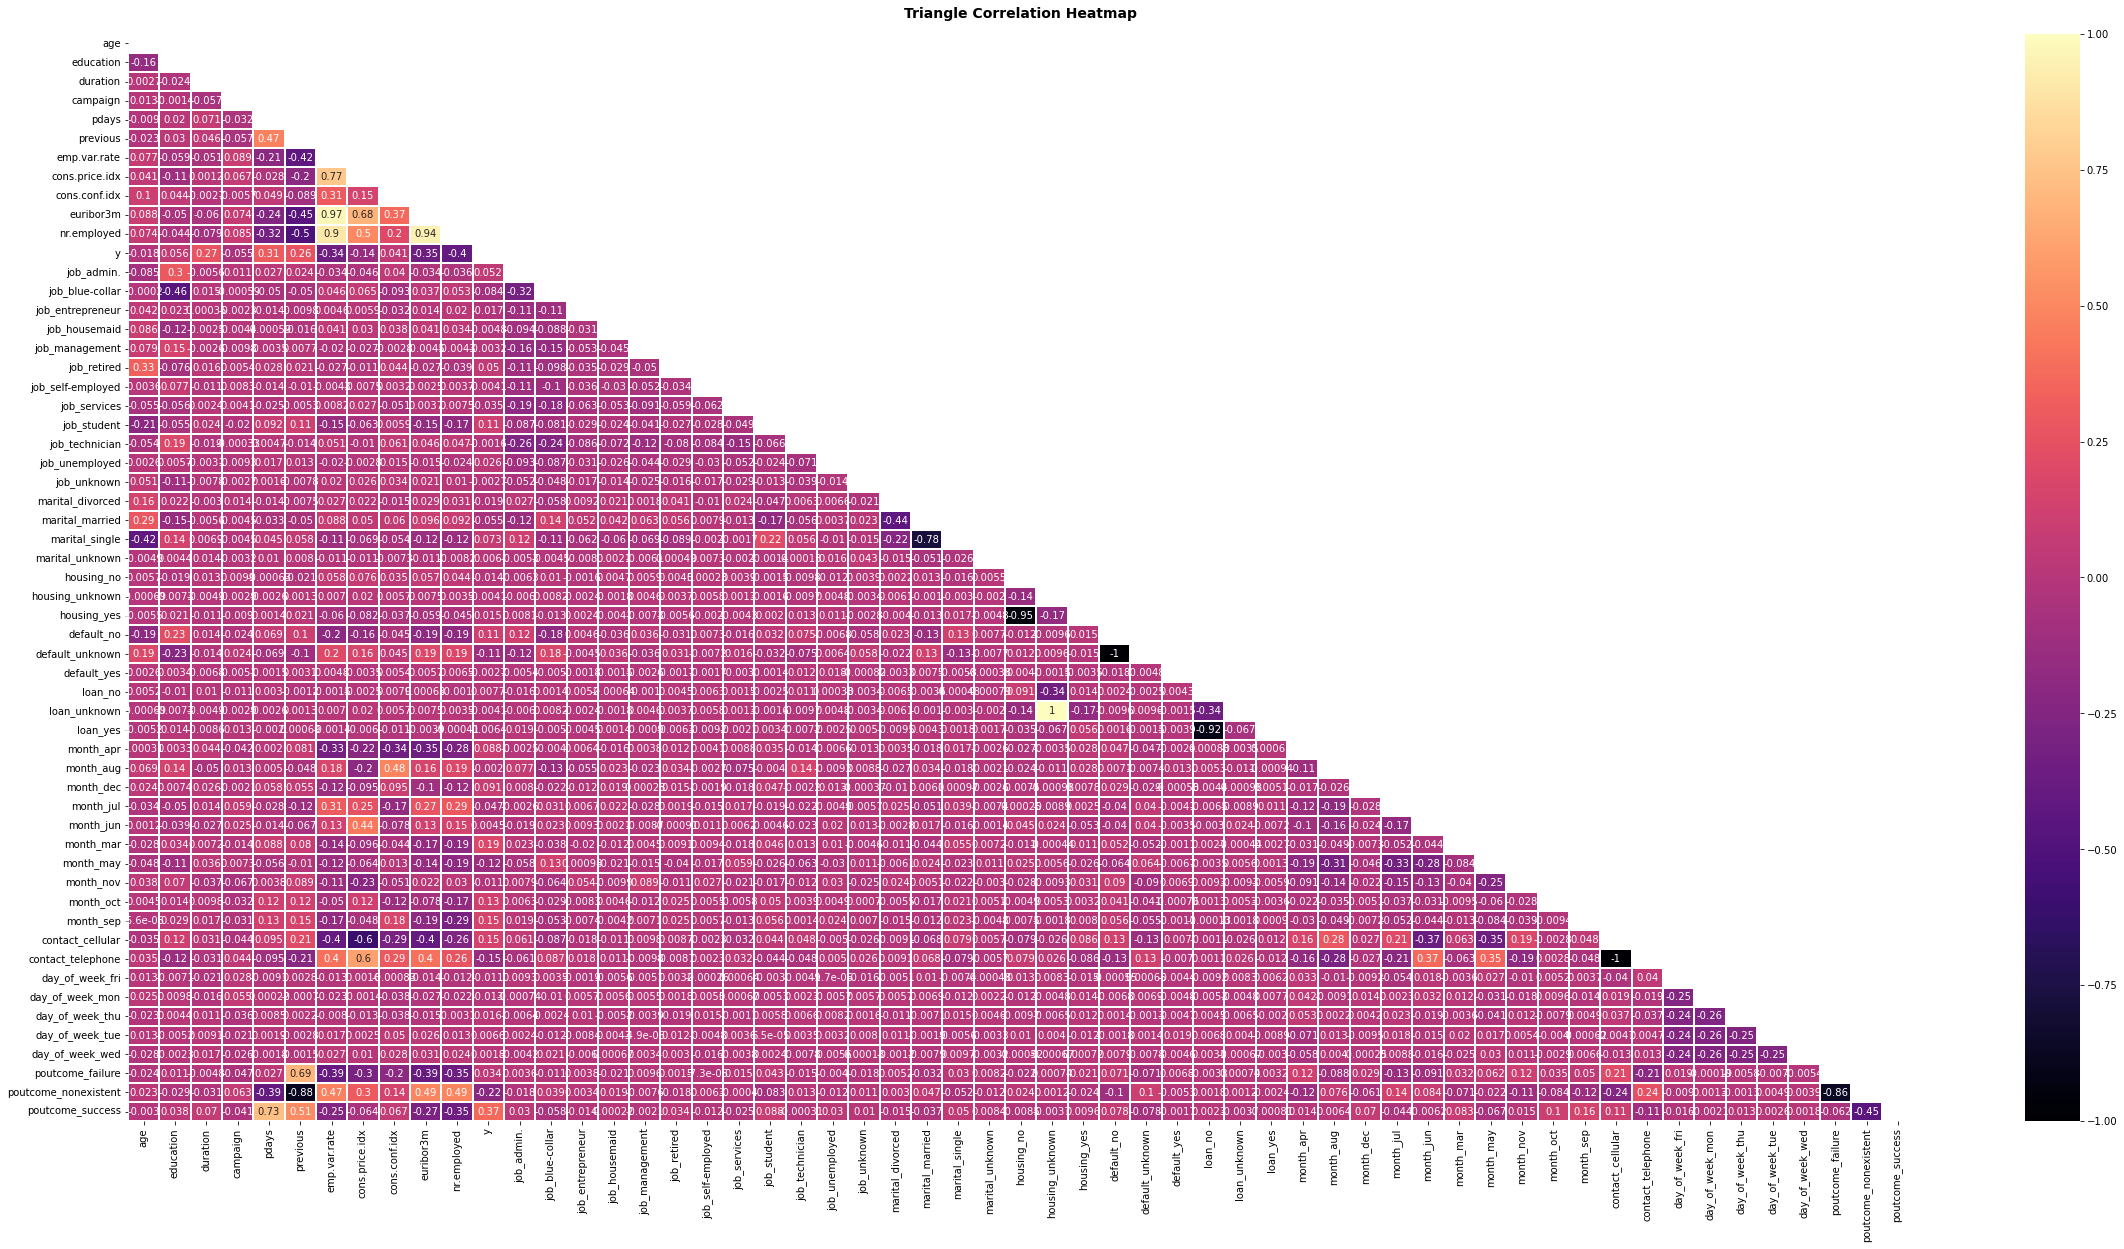

In [30]:
plt.figure(figsize = (40, 20))
mask = np.triu(np.ones_like(df_scaled.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_scaled.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='magma', linewidth=0.1)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14, 'fontweight':'bold'}, pad=16);


#### 4.4.2 MultiCollinearity Checking

In [31]:
X = df_scaled.drop(['y'], axis=1)
y = df_scaled['y']


vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df.round(1)

,feature,VIF
0,age,1.5
1,education,1.6
2,duration,1.0
3,campaign,1.0
4,pdays,2.3
5,previous,5.4
6,emp.var.rate,248.5
7,cons.price.idx,90.2
8,cons.conf.idx,7.7
9,euribor3m,201.1


In [32]:
# we need to drop some variables from the dataset which are causing this perfect multicollinearity (Inf Values)
X= df_scaled.drop(["y", "euribor3m", "emp.var.rate", "poutcome_nonexistent", "day_of_week_tue", "contact_cellular",
                  "month_aug", "job_self-employed", "marital_married", "housing_no", "housing_unknown",
                  "default_unknown", "loan_no"], axis=1)

y = df_scaled[['y']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_df.round(1)

# VIF of around or less than 10 is acceptable [Ref1]
# Ref1: Mayo, Francis L., et al. "Exploring the changes in travel behavior in a developing country amidst the COVID-19 pandemic: Insights from Metro Cebu, Philippines." Transportation research interdisciplinary perspectives 12 (2021): 100461.
# When keeping "cons.price.idx" and "nr.employed" variables, we noticed enhancement in the calssification performance. So, we decided to keep them

,feature,VIF
0,age,8.8
1,education,10.7
2,duration,3.2
3,campaign,1.7
4,pdays,2.3
5,previous,6.0
6,cons.price.idx,23.2
7,cons.conf.idx,12.6
8,nr.employed,24.4
9,job_admin.,7.0


In [33]:
final_selected_features = vif_df['feature'].values.tolist()
final_selected_features

['age',
 'education',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_single',
 'marital_unknown',
 'housing_yes',
 'default_no',
 'default_yes',
 'loan_unknown',
 'loan_yes',
 'month_apr',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_success']

In [34]:
X_final = df_scaled[final_selected_features]
X_final.head()

,age,education,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_single,marital_unknown,housing_yes,default_no,default_yes,loan_unknown,loan_yes,month_apr,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_wed,poutcome_failure,poutcome_success
0,0.750000,0.285714,0.405280,0.0,0.0,0,0.698753,0.685714,0.859735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0.769231,0.714286,0.231366,0.0,0.0,0,0.698753,0.685714,0.859735,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,0.384615,0.714286,0.350932,0.0,0.0,0,0.698753,0.685714,0.859735,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,0.442308,0.428571,0.234472,0.0,0.0,0,0.698753,0.685714,0.859735,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0.750000,0.714286,0.476708,0.0,0.0,0,0.698753,0.685714,0.859735,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [35]:
df_final = X_final.copy()
df_final['y'] = df_scaled['y']
df_final.shape 

(35165, 45)

In [36]:
df_final.to_csv(r"datasets/processed_data_final.csv", index=False)
print("\n*** Processed data successfully saved to ## datasets/processed_data_final.csv ## file ***\n")


*** Processed data successfully saved to ## datasets/processed_data_final.csv ## file ***

